## Scientific Computing 2022: Homework Assignment 2 
Due Monday October 23, 2022 (23:59)

### Problem 1 (2 points)
Let $A_q=\left(\begin{matrix}1 & q\\ 0 & 1\end{matrix}\right)$ with $q\in\mathbb R$. 
* For any $q$, find condition number $\kappa(A_q)$ with respect to the $l^2$-norm.
* Give an example of specific values of $q,\mathbf b, \Delta\mathbf b$ such that, when solving $A_q\mathbf x = \mathbf b$ and $A_q(\mathbf x+\Delta \mathbf x)=\mathbf b +\Delta\mathbf b$, we get 

$$\frac{\|\Delta \mathbf x\|}{\|\mathbf x\|}\ge 10^6\frac{\|\Delta\mathbf b\|}{\|\mathbf b\|}.$$

## Solution: 
### 1

if $\|\cdot\|$ is the $l^2$-norm and $A$ is arbitrary, then $$\kappa(A)=\sqrt{\frac{\lambda_{\max}(A^*A)}{\lambda_{\min}(A^*A)}}$$

Since $a_{ij}, q \in\mathbb R $, then $A^T = A^*$

As a result: $$\kappa(A)=\sqrt{\frac{\lambda_{\max}(A^TA)}{\lambda_{\min}(A^TA)}}$$

$$A^T A = \begin{pmatrix}
1 & q\\ 
q & q^2+1\\ 
\end{pmatrix}$$

Let's find eiugenvalues:
$$det\begin{pmatrix}
1-\lambda & q\\ 
q & q^2+1-\lambda\\ 
\end{pmatrix} = \lambda^2-\lambda(q^2+2)+1=0$$
$$\lambda_{1,2} = \frac{(q^2+2) \pm \sqrt{(q^2+2)^2-4}}{2}=\frac{(q^2+2) \pm \sqrt{q^4+4q^2}}{2}= \frac{(q^2+2) \pm |q|\sqrt{q^2+4}}{2}$$
$$\kappa(A_q)=\sqrt{\frac{q^2+2+|q|\sqrt{q^2+4}}{q^2+2-|q|\sqrt{q^2+4}}}$$

### 2

$$
\begin{pmatrix}
         x_1 + qx_2\\
         x_2
     \end{pmatrix}
     =
\begin{pmatrix}
         b_1\\
         b_2
     \end{pmatrix}
$$  

$$
\begin{pmatrix}
         x_1 + \Delta x_1 + qx_2 +q\Delta x_2\\
         x_2 + \Delta x_2
     \end{pmatrix}
     =
\begin{pmatrix}
         b_1 +\Delta b_1\\
         b_2 +\Delta b_2
     \end{pmatrix}
$$

$$
\begin{pmatrix}
         \Delta x_1 +q\Delta x_2\\
         \Delta x_2
     \end{pmatrix}
     =
\begin{pmatrix}
         \Delta b_1\\
         \Delta b_2
     \end{pmatrix}
$$
As a result:
$$
\frac{\sqrt{\Delta x_1^2 + \Delta x_2^2}}{\sqrt{ x_1^2 +  x_2^2}} \ge 10^6 \frac{\sqrt{\Delta x_1^2+2q\Delta x_1 \Delta x_2 + q^2 \Delta x_2^2 + \Delta x_2^2}}{\sqrt{x_1^2 + 2qx_1x_2 + q^2x_2^2 +x_2^2}}
$$

$$
x_1^2+x_2^2 \le x_1^2+x_2^2+2qx_1x_2+q^2x_2^2
$$

$$
q > 2\frac {x_1}{x_2}
$$


In [2]:
import numpy as np

x = np.array([10,1])
q = 2*x[1]/x[0]
A = np.array([[1,q],[0,1]])
b = np.dot(A,x)
dx = np.array([1,20])

norm_delta_b = np.linalg.norm(b)/np.linalg.norm(x)*np.linalg.norm(dx)/10**6
db = np.empty((2,1))
db[0] = norm_delta_b/2
db[1] = (norm_delta_b**2 - db[0]**2)/2


print('q: ', q)
print('b: ', b)
print('db: ', db)
print(np.linalg.norm(dx)/np.linalg.norm(x)>np.linalg.norm(db)/np.linalg.norm(b)*10**6)

q:  0.2
b:  [10.2  1. ]
db:  [[1.02107786e-05]
 [1.56390000e-10]]
True


### Problem 2 (2 points)
* Write a program to compute an approximate value for the derivative of a function using the finite-difference formula 

  $$f'(x)\approx \frac{f(x+h)-f(x)}{h}.$$

  Test your program using the function $\tan(x)$ at $x=1$. Determine the error by comparing with the value obtained using the analytic derivative. Plot the magnitude of the error as a function of $h$, for $h=10^{-k}, k=0,\ldots,16$. You should use log scale for $h$ and for the magnitude of the error. What is the minimum value of the error and at which $h$ is it achieved? Explain this result theoretically.
* Repeat the exercise using the centered difference approximation

 $$f'(x)\approx \frac{f(x+h)-f(x-h)}{2h}.$$

 What is now different and why?

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

def derivative(x,h):
    return (np.tan(x+h) - np.tan(x))/h
     
def df(x):
    return 1/((np.cos(x))**2)

def centered(x,h):
    return (np.tan(x+h) - np.tan(x-h))/(2*h)

def error(f1,f2):
    return abs(f1-f2)

h = np.logspace(-16,0,17)
x = 1
error_list1 = list()
error_list2 = list()

for step in h:
    f1 = derivative(x,step)
    f2 = df(x)
    f3 = centered(x,step)
    error_list1.append(error(f1,f2))
    error_list2.append(error(f3,f2))
print('minimum error for finite difference', np.min(error_list1), 'is achieved at h =', h[np.argmin(error_list1)])
print('minimum error for centered difference', np.min(error_list2), 'is achieved at h =', h[np.argmin(error_list2)])

minimum error for finite difference 2.554135347665465e-08 is achieved at h = 1e-08
minimum error for centered difference 6.2239102760486276e-12 is achieved at h = 1e-07


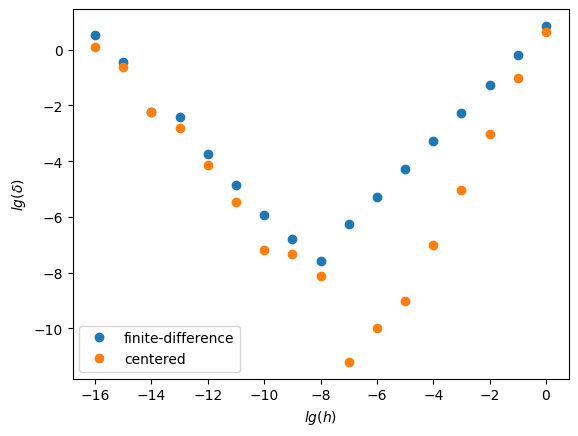

In [6]:
plt.plot(np.log10(h),np.log10(error_list1),'o', label = 'finite-difference')
plt.plot(np.log10(h),np.log10(error_list2),'o', label = 'centered')
plt.xlabel('$lg(h)$')
plt.ylabel('$lg(\\delta)$')
plt.legend();

From the Taylor's series:
\begin{equation}
f(x+h)\approx f(x)+hf′(x)+ \frac{f′′(x)h^2}{2}+ \frac{f′′′(x)h^3}{6}+... 
\tag{1}
\end{equation}  

\begin{equation}
\frac{f(x+h) - f(x)}{h} \approx f′(x)+ \frac{f′′(x)h}{2} 
\end{equation}

for small $h$ the higher order terms are negligible.

Also:
\begin{equation}
f(x-h)\approx f(x)-hf′(x)+ \frac{f′′(x)h^2}{2}- \frac{f′′′(x)h^3}{6}+... 
\tag{2}
\end{equation}  

Subtracting (2) from (1), we obtain:

\begin{equation}
\frac{f(x+h)-f(x-h)}{2h}\approx f′(x)+ \frac{f′′′(x)h^2}{6} 
\tag{2}
\end{equation} 

Since $h^2 < h$ for small $h$, the the centered difference approximation is more accurate than the finite-difference approximation


### Problem 3 (2 points)
* Implement regularized regression with an adaptive choice of regularization parameter. Your algorithm must accept the training data (`Xtrain`, `Ytrain`) and the input part of test data (`Xtest`), and output a prediction for test data (`Ypred`). You may use standard linear algebra libraries, but not specialized predictive modeling software (e.g., `scikit-learn`). Your algorithm should choose the regularization parameter by some optimization over a reasonable range of values and may use a sub-division of the training data into a train-in-train and a test-in-train components.


* Test your algorithm on real data from UCI repository:
  * https://archive.ics.uci.edu/ml/datasets/Relative+location+of+CT+slices+on+axial+axis
  * https://archive.ics.uci.edu/ml/datasets/Physicochemical+Properties+of+Protein+Tertiary+Structure
  
  Use random subsets of 300 rows as training sets, and the remaining rows as the test sets. Use the relative RMS error as the measure of accuracy.
  Compare your results with results of some linear models implemented in standard predictive modeling software    (e.g., `Ridge` and `LinearRegression` from `scikit-learn`).

# Data: Relative location of CT slices on axial axis Data Set

## Reading the data

In [7]:
from copy import deepcopy

In [8]:
data = np.genfromtxt(r'C:\Users\ivang\Desktop\skoltech_courses\scientific computing\slice_localization_data.csv', delimiter=',', skip_header=1)


In [9]:
N = len(data)
A = data[:,:-1] # input values
b = data[:,-1] # output values

## Splitting the data to train and test parts

In [10]:
def train_test_split(X, y, train_size = 300, shuffle = True):
    
    if len(X) != len(y):
        raise Exception('len of X and y must be the same')
        
    
    if shuffle == True:
        p = np.random.permutation(len(X))
        X = X[p,:]
        y = y[p]
    
    X_train = X[0:train_size,:]
    X_test = X[train_size:,:]
    y_train = y[0:train_size]
    y_test = y[train_size:]
    
    return X_train, X_test, y_train, y_test

In [15]:
X_train, X_test, y_train, y_test = train_test_split(A,b,shuffle = True, train_size = 300)

## Building regression model

$$\mathbf x = (A^tA+\mu)^{-1}A^t\mathbf b.$$

In [16]:
def getRRMSE(btest, bpred):
    return np.linalg.norm(bpred-btest)/np.linalg.norm(btest-np.mean(btest))

In [17]:
def regression(X,y,mu=1e-05):
    Q = X.T.dot(X)
    y1 = X.T.dot(y)
    coef = np.linalg.inv(Q+mu*np.eye(X.shape[1])).dot(y1)
    return coef

In [18]:

def optimization(X_train, y_train, mu):
    
    res = list()
    for m in mu:
        coef = regression(X_train, y_train,m)
        y_pred = X_train.dot(coef)
        res.append(getRRMSE(y_train,y_pred))
    
    m_opt = mu[np.argmin(res)]
    return res, m_opt

In [19]:
m = np.logspace(-7,2,200)
results, m_opt = optimization(X_train, y_train, m)
m_opt

3.1440354715915e-07

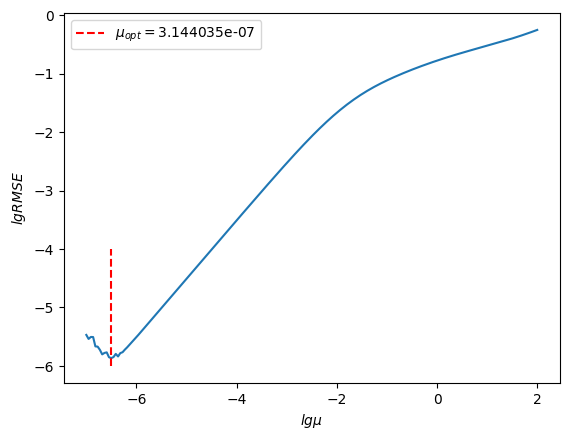

In [20]:
plt.plot(np.log10(m),np.log10(results))

plt.xlabel('$lg\\mu$')
plt.ylabel('$lgRMSE$')
plt.vlines(np.log10(m_opt), ymin=-6, ymax=-4, color='r', linestyles='dashed', label = '$\\mu_{opt}= $%e' %m_opt)

plt.legend();

In [22]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

ridge = Ridge(alpha = m_opt)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
print('RMSE error for Ridge model:', getRRMSE(y_test, y_pred_ridge))


lg = LinearRegression()
lg.fit(X_train, y_train)
y_pred_lg = lg.predict(X_test)
print('RMSE error for LinearRegression model:', getRRMSE(y_test, y_pred_lg))

coef = regression(X_train, y_train, m_opt)
y_pred = X_test.dot(coef)
print('RMSE error for CustomRegression model:', getRRMSE(y_test, y_pred))

RMSE error for Ridge model: 1.2983069187592196
RMSE error for LinearRegression model: 1.2983147409517997
RMSE error for CustomRegression model: 1.3020506080192171


# Data: Physicochemical Properties of Protein Tertiary Structure Data Set

## Reading the data

In [23]:
data = np.genfromtxt(r'C:\Users\ivang\Desktop\skoltech_courses\scientific computing\CASP.csv', delimiter=',', skip_header=1)
data.shape

(45730, 10)

In [24]:
N = len(data)
A = data[:,:-1] # input values
b = data[:,-1] # output values

## Splitting the data to train and test parts

In [25]:
X_train, X_test, y_train, y_test = train_test_split(A,b,shuffle = True, train_size = 300)

## Building regression model

In [27]:
m = np.logspace(-6,10,100)
results, m_opt = optimization(X_train, y_train, m)
m_opt

1e-06

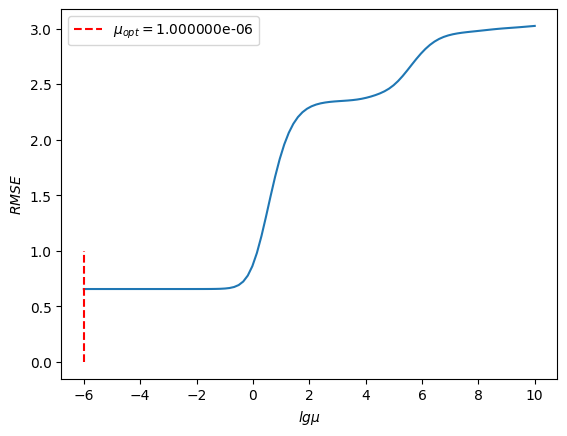

In [36]:
plt.plot(np.log10(m),(results))

plt.xlabel('$lg\\mu$')
plt.ylabel('$RMSE$')
plt.vlines(np.log10(m_opt), ymin=-0, ymax=1, color='r', linestyles='dashed', label = '$\\mu_{opt}= $%e' %m_opt)

plt.legend();

In [37]:
ridge = Ridge(alpha = m_opt)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
print('RMSE error for Ridge model:', getRRMSE(y_test, y_pred_ridge))

lg = LinearRegression()
lg.fit(X_train, y_train)
y_pred_lg = lg.predict(X_test)
print('RMSE error for LinearRegression model:', getRRMSE(y_test, y_pred_lg))

coef = regression(X_train, y_train, m_opt)
y_pred = X_test.dot(coef)
print('RMSE error for CustomRegression model:', getRRMSE(y_test, y_pred))

RMSE error for Ridge model: 0.4213192792314928
RMSE error for LinearRegression model: 0.42131928490439835
RMSE error for CustomRegression model: 0.716744678098945


### Problem 4 (2 points)
Suppose that we use the Leapfrog algorithm with some $\Delta t$ to simulate the dynamics of the harmonic oscillator (https://en.wikipedia.org/wiki/Harmonic_oscillator) with positive mass $m$ and force constant $k$ (in other words, with the energy function $H=\frac{m\dot x^2}{2}+\frac{kx^2}{2}$). Assuming a perfect implementation of Leapfrog, at which combinations of $\Delta t, m, k$ will the simulation diverge as $n\to\infty$, in the sense that $\sup_n(\tilde x_n^2+\tilde v_{n+1/2}^2)=\infty$?

\begin{align}
\tilde x_{n+1} &= \tilde x_{n}+\tilde v_{n+1/2}\Delta t\\
\tilde v_{n+1/2} &= \tilde v_{n-1/2}-\frac{k}{m}x_n\Delta t
\end{align}

$$
\tilde x_{n+1} - \tilde x_{n} = \tilde v_{n+1/2}\Delta t
$$

$$
\tilde x_{n} - \tilde x_{n-1} = \tilde v_{n-1/2}\Delta t
$$

$$
\frac{\tilde x_{n+1} - 2\tilde x_{n}  + \tilde x_{n-1}}{\Delta t}= -\omega^2\Delta t x_n, \omega = \sqrt{\frac{k}{m}}
$$

let $\tilde x_{n} = ce^{i\tilde \omega n\Delta t}$; 
$c,\tilde \omega = const$ :

$$
\frac{ce^{i\tilde \omega (n+1)\Delta t} - 2ce^{i\tilde \omega n\Delta t}  + ce^{i\tilde \omega (n-1)\Delta t}}{\Delta t^2}= -\omega^2 ce^{i\tilde \omega n\Delta t}
$$

$$
e^{i\tilde \omega\Delta t} - 2  + e^{-i\tilde \omega \Delta t}= -\omega^2 \Delta t^2
$$

$$
2 - 2\cos{\tilde \omega\Delta t} = \omega^2 \Delta t^2
$$

$$
\sin^2{\frac{\tilde \omega\Delta t}{2}} = \frac{\omega^2 \Delta t^2}{4}
$$

$$
\sin{\frac{\tilde \omega\Delta t}{2}} = \frac{\omega \Delta t}{2}
$$

Therefore:
$$
\omega \Delta t \le 2
$$

So, when:
$$
\frac{k\Delta t^2}{m} \le 4
$$
simulation converges

### Problem 5 (2 points)
Consider the velocity Verlet method for solving the equation $\frac{d}{dt}{x\choose v}={v\choose f_1(x)}$: 

\begin{align}
\tilde v_{n+1/2} &= \tilde v_{n}+\frac{1}{2}f_1(\tilde x_n)\Delta t\\
\tilde x_{n+1} &= \tilde x_{n}+\tilde v_{n+1/2}\Delta t\\
\tilde v_{n+1} &= \tilde v_{n+1/2}+\frac{1}{2}f_1(\tilde x_{n+1})\Delta t
\end{align}
Find its global convergence order and verify it experimentally.

$$\tilde x_{n+1} =  \tilde x_{n}+ \tilde v_{n+1/2}\Delta t$$

$$\tilde x_{n+1} =  \tilde x_{n}+ (\tilde v_{n}+\frac{1}{2}f_1(\tilde x_n )\Delta t)\Delta t$$

$$\tilde x_{n+1} =  \tilde x_{n}+ \tilde v_{n}\Delta t+\frac{1}{2}f_1(\tilde x_n )\Delta t^2$$

From Taylor's series:

$$ x_{n+1} = x_{n} + \dot x_{n}\Delta t +\frac{\ddot  x}{2}\Delta t^2 + O(\Delta t^3)$$
$$\Delta x = x_{n+1} - x_n = \dot x_{n}\Delta t +\frac{\ddot  x}{2}\Delta t^2 + O(\Delta t^3)$$
$$LocErr = \Delta \tilde x - \Delta x = O(\Delta t^3)$$
$$GlErr = LocErr * N \propto LocErr * \frac{1}{\Delta t} = O(\Delta t^2)$$

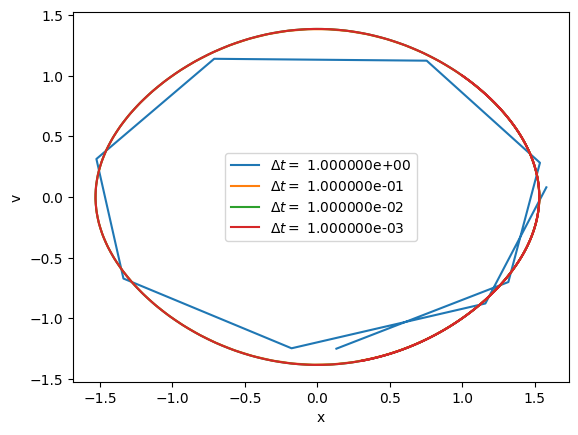

In [59]:
def E(X):
    return X[1]*X[1]/2-np.cos(X[0])

def f1(x):
    return - np.sin(x)

def Verle(f1, x0, v0, dt=1e-3, N=10000):
    xHistory = [x0] # at integer times
    vHistory_ = [v0+dt/2.*f1(x0)] # at half-integer times
    vHistoryint = [v0]
    tHistory = [0]
    for n in range(N):
        vHistory_.append(vHistoryint[-1]+0.5*f1(xHistory[-1])*dt)
        xHistory.append(xHistory[-1]+dt*vHistory_[-1])
        vHistoryint.append(vHistory_[-1] + 0.5*f1(xHistory[-1])*dt)
        tHistory.append(dt*(n+1))
    return xHistory[1:], vHistoryint[1:], tHistory[1:]


for m in range(0,4):
    dt = 10**(-m)
    xHistory, vHistory,_ = Verle(f1, 1., 1., dt=dt, N=int(10./dt)) 
    plt.plot(xHistory, vHistory, label='$\Delta t=$ %e' %dt )
plt.xlabel('x')
plt.ylabel('v')
plt.legend(loc='best')  
plt.show()

Error in E at dt=1.000000e+00: 2.200689e-01
Error in E at dt=1.000000e-01: 1.425750e-03
Error in E at dt=1.000000e-02: 1.274388e-05
Error in E at dt=1.000000e-03: 1.257985e-07
Error in E at dt=1.000000e-04: 1.256323e-09


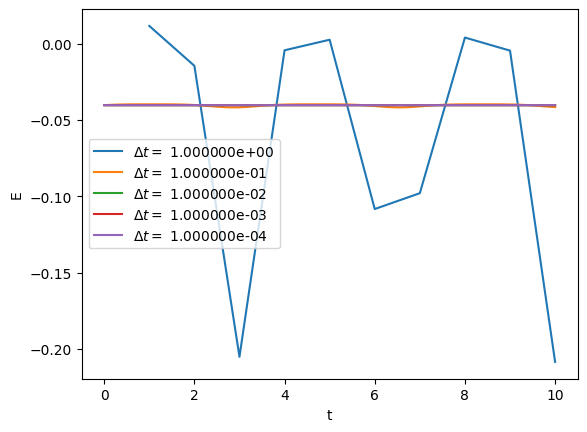

In [60]:
for m in range(0,5):
    dt = 10**(-m)
    xHistory, vHistoryint, tHistory = Verle(f1, 1., 1., dt=dt, N=int(10./dt)) 
    Ehistory = [E([xHistory[n], vHistoryint[n]]) for n in range(len(xHistory))]
    plt.plot(tHistory, Ehistory, label='$\Delta t=$ %e' %dt )
    print ('Error in E at dt=%e: %e' %(dt, np.abs(Ehistory[-1]-Ehistory[0]))) 
plt.xlabel('t')
plt.ylabel('E')
plt.legend(loc='best')
plt.show()